In [11]:
import pandas as pd

In [12]:
print("pandas is installed and working!")

pandas is installed and working!


In [13]:
!ls path_to_folder_with_csv

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
file_path = r'C:\Users\User\Downloads\Titanic-Dataset.csv'  # Example absolute path


In [15]:
df = pd.read_csv(r'C:\Users\User\OneDrive - The Pennsylvania State University\Desktop\dsproject#1\data\Titanic-Dataset.csv')

In [16]:
import pandas as pd


In [17]:
import pandas as pd

# Specify the file path (absolute path as an example)
file_path = r"C:\Users\User\Downloads\archive\Titanic-Dataset.csv"

# Load the dataset
df = pd.read_csv(file_path)

# Preview the dataset
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [18]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

#Display basic statistics for numerical columns
print("\nDataset Statistics:")
print(df.describe())

# Display column names
print("\nColumns in Dataset:")
print(df.columns)

# Check for missing values in each column
print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dataset Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.5230

1.isnull()-

what it does:
This method checks every element in the DataFrame (df) to see if it is NaN (missing or null value).
It returns a DataFrame of the same shape as df, but with True where a value is missing and False otherwise.

Why it’s Used:
To identify which elements in the dataset are missing. Missing data can cause errors or lead to inaccurate analysis if not handled properly.

In [19]:
import pandas as pd
data = {'Name': ['Alice', 'Bob', None], 'Age': [25, None, 30]}
df = pd.DataFrame(data)
print(df.isnull())


    Name    Age
0  False  False
1  False   True
2   True  False


2. sum():

What it Does:
When called on a DataFrame, sum() adds up the True values for each column.
In Python, True is treated as 1 and False as 0, so this effectively counts the number of True values (i.e., the number of missing values) in each column.

Why it’s Used:
Instead of looking at all True/False values from isnull(), we want a simple count of missing values per column.

In [20]:
print(df.isnull().sum())


Name    1
Age     1
dtype: int64


thats the difference between the two, and why we used

 print(df.isnull().sum())

Step 1: Handling Missing Values


There are two main strategies:

1.Fill Missing Values (Imputation): Replace missing values with meaningful substitutes.

2.Drop Rows or Columns: Remove data that's missing too much information.

Let’s apply these strategies to the Titanic dataset:

Handle Numerical Columns
For numerical data (like Age), missing values can be filled with:

The median (preferred for skewed distributions).

The mean (if the data is normally distributed).


1. Why the Median is Often Preferred
The median is robust to outliers because it represents the middle value of the data. The mean, on the other hand, can be heavily influenced by extreme values (outliers).

If the data is skewed (i.e., not symmetric), the median gives a better central value for imputation.

If the data is normally distributed (symmetric), the mean and median are similar, and either can be used.





1. Why the Median is Often Preferred
The median is robust to outliers because it represents the middle value of the data. The mean, on the other hand, can be heavily influenced by extreme values (outliers).

If the data is skewed (i.e., not symmetric), the median gives a better central value for imputation.
If the data is normally distributed (symmetric), the mean and median are similar, and either can be used.

2. How to Check if Data is Skewed
You can check for skewness using summary statistics or visualizations:

a. Summary Statistics:

Use describe() to compare the mean and median:





In [21]:
print(df['Age'].describe())


count     2.000000
mean     27.500000
std       3.535534
min      25.000000
25%      26.250000
50%      27.500000
75%      28.750000
max      30.000000
Name: Age, dtype: float64


Mean: 29.7

Median (50th percentile): 28.0

Here, the mean is slightly higher than the median, suggesting mild skewness (possibly due to older passengers).

b. Visualizations:

You can visualize the distribution of the data with a histogram:

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Age distribution
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()


ModuleNotFoundError: No module named 'seaborn'

In [29]:
!pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
     ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/7.8 MB 2.6 MB/s eta 0:00:03
     - -------------------------------------- 0.3/7.8 MB 2.9 MB/s eta 0:00:03
     --- ------------------------------------ 0.6/7.8 MB 4.3 MB/s eta 0:00:02
     ---- ----------------------------------- 0.8/7.8 MB 4.7 MB/s eta 0:00:02
     ---- ----------------------------------- 0.9/7.8 MB 4.3 MB/s eta 0:00:02
     ------ --------------------------------- 1.2/7.8 MB 4.3 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/7.8 MB 4.4 MB/s eta 0:00:02
     --------- ------------------------------ 1.8/7.8 MB 4.8 MB/s eta 0:00:02
     ---------- ----------------------------- 2.1/7.8 MB 5.2 MB/s eta 0:00:02
     ----------- ---------------------------- 2.3/7.8 MB 4.9 MB/s eta 0:00:02
     ------------- -------------------------- 2.6/7.8 MB 5.1 MB/s eta 0:00:02
     ----------


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [30]:
import seaborn as sns
print("Seaborn is working!")


Seaborn is working!


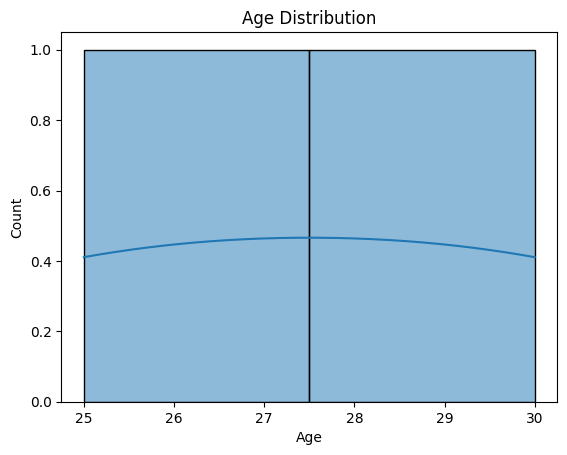

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the Age distribution
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()


data=df: Specifies the dataset to use.

x='Age': Specifies the column to visualize (in this case, Age).

kde=True: Adds a KDE (Kernel Density Estimation) curve, which smooths the histogram to approximate a continuous probability distribution.

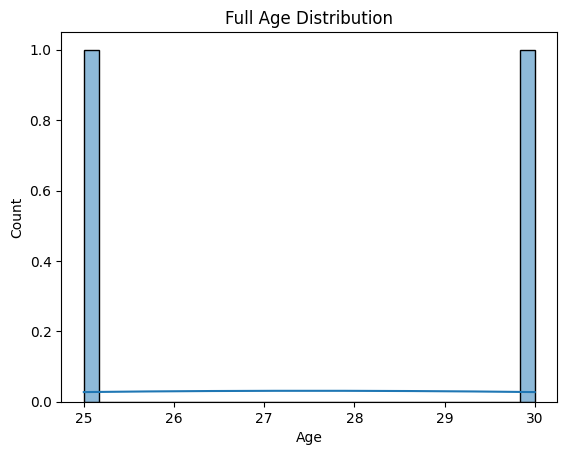

In [32]:
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title('Full Age Distribution')
plt.show()


Columns with Too Many Missing Values


If a column has a significant percentage of missing data (e.g., >50%), it’s often better to drop it:

4. Visualize Missing Values (Optional)


You can create a heatmap to visualize missing values using Seaborn:

Code:

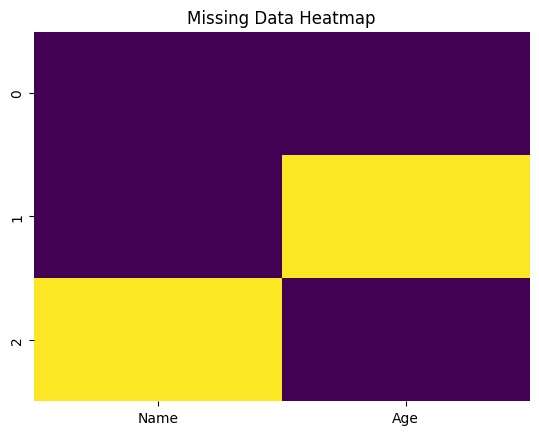

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()


Code Explanation


1. Save the Cleaned Dataset



df.to_csv('data/titanic_cleaned.csv', index=False)


df.to_csv(): This method saves a Pandas DataFrame (df) as a CSV file.


Arguments:
'data/titanic_cleaned.csv':

The path where the CSV file will be saved.

The path data/ indicates a folder named data inside your current working directory (dsproject#1).

The file will be named titanic_cleaned.csv.



index=False:

By default, Pandas includes the DataFrame’s index (row numbers) in the saved CSV file.

index=False prevents the row index from being saved to keep the CSV cleaner.


print("Cleaned dataset saved successfully!"):

Simply outputs a success message when the save operation is complete.


In [41]:
df.columns = df.columns.str.strip()
print("Cleaned Column Names:")
print(df.columns)

df.rename(columns={'Sex ': 'Sex'}, inplace=True)

print("Column Names in the DataFrame:")
print(df.columns)



Cleaned Column Names:
Index(['Name', 'Age'], dtype='object')
Column Names in the DataFrame:
Index(['Name', 'Age'], dtype='object')


In [47]:
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [52]:
file_path = r"C:\Users\User\OneDrive - The Pennsylvania State University\Desktop\dsproject#1\data\titanic_cleaned.csv" # Adjust path as needed
df = pd.read_csv(file_path)

 Survival Rates by Gender
 
 Purpose:
Shows the distribution of Survived across genders (Sex).

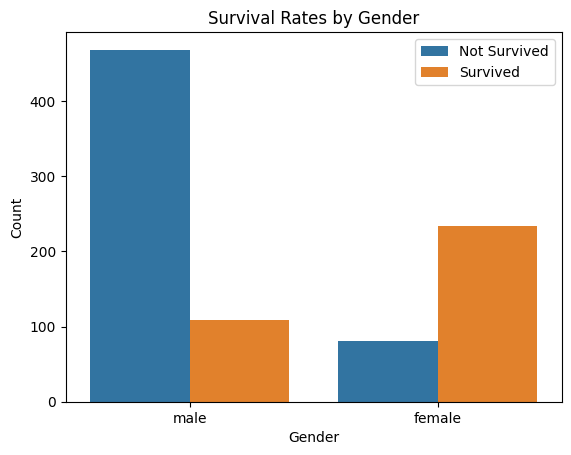

In [48]:
# Plot survival rates by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


3.2: Distribution of Passenger Classes



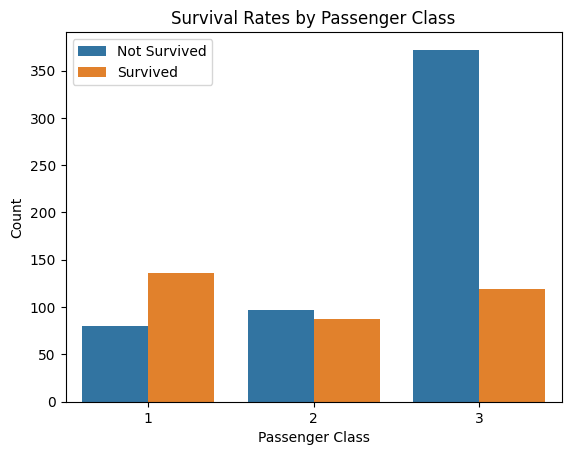

In [49]:
# Plot the distribution of passenger classes
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()


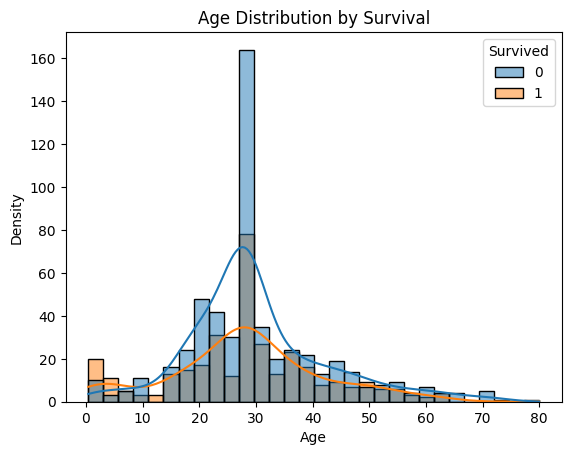

In [50]:
sns.histplot(data=df, x='Age', kde=True, hue='Survived')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


In [54]:
import pandas as pd
file_path = r"C:\Users\User\OneDrive - The Pennsylvania State University\Desktop\dsproject#1\data\titanic_cleaned.csv"
df = pd.read_csv(file_path)



In [55]:
# Heatmap for correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'correlation_matrix' is not defined